In [6]:

import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import random
from api_keys import weather_api_key
from citipy import citipy
from datetime import datetime

import scipy.stats as st
from scipy.stats import linregress


In [7]:

#Generate random lat/lon coordinates
counter = 0
rndlat=[]
rndlon=[]
city_count_input = input("how many cities data do you want to gather?")
while len(rndlat) < int(city_count_input):
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1
 
lat_long_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
lat_long_df.head()

how many cities data do you want to gather?740


,lat,lon
0,60.908935,108.920912
1,-70.413229,132.662943
2,-17.701565,125.053819
3,-38.836019,4.628251
4,14.531621,166.166674


In [9]:
#get nearest city from the random genereated lat and long values inside dataframe geo_df
city = []
country = []


for index, row in lat_long_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    city.append(city_name)
    country.append(country_code)
    
city_df= pd.DataFrame ({"city": city, "country": country})
city_df.drop_duplicates(["city", "country"])
#Display city and country names
city_df.head()


,city,country
0,yerbogachen,ru
1,new norfolk,au
2,broome,au
3,saldanha,za
4,butaritari,ki


In [10]:
# get the no of cities in the datafram to processed to the weather api 
city_df.count()


city       740
country    740
dtype: int64

In [11]:
city_weather_data=[]
#make API call to weather data and collect the data returened via json calls and handles exceptions appropriately
weather_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="
#rate_limiter = RateLimiter(max_calls=50, period=60)
query_url
for index, row in city_df.iterrows():
    #print("hello")
    city_q=row["city"]
    print(city_q)
    response = requests.get(query_url + city_q).json()
    #print(response)
    try:
        temp=response["main"]["temp"]
        humid=response["main"]["humidity"]
        cloud=response["clouds"]["all"]
        wind=response["wind"]["speed"]
        city_lat=response["coord"]["lat"]
        city_name=response["name"]
        city_country=response["sys"]["country"]
        city_weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
        print (f"Processing record #{index+1} -- {city_q}")
        print (f'{weather_url}appid={weather_api_key}&units={units}&q={city_q}')
        #query_dtl =query_url +city_q
        #print (query_dtl)
        print ("----------------------------------------------------------------")
    except:
        print (f"Weather for {city_q} not found.")
        print ("----------------------------------------------------------------")
        continue


yerbogachen
Processing record #1 -- yerbogachen
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=yerbogachen
----------------------------------------------------------------
new norfolk
Processing record #2 -- new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=new norfolk
----------------------------------------------------------------
broome
Processing record #3 -- broome
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=broome
----------------------------------------------------------------
saldanha
Processing record #4 -- saldanha
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=saldanha
----------------------------------------------------------------
butaritari
Processing record #5 -- butaritari
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de5993

Processing record #41 -- bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=bredasdorp
----------------------------------------------------------------
hobart
Processing record #42 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=hobart
----------------------------------------------------------------
umm kaddadah
Processing record #43 -- umm kaddadah
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=umm kaddadah
----------------------------------------------------------------
jamestown
Processing record #44 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=jamestown
----------------------------------------------------------------
tsihombe
Weather for tsihombe not found.
----------------------------------------------------------------
albany
Pro

Processing record #81 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=vaini
----------------------------------------------------------------
lebu
Processing record #82 -- lebu
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=lebu
----------------------------------------------------------------
tevriz
Processing record #83 -- tevriz
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=tevriz
----------------------------------------------------------------
cockburn town
Processing record #84 -- cockburn town
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=cockburn town
----------------------------------------------------------------
bredasdorp
Processing record #85 -- bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units

Processing record #122 -- berlevag
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=berlevag
----------------------------------------------------------------
boyolangu
Processing record #123 -- boyolangu
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=boyolangu
----------------------------------------------------------------
nizhniy baskunchak
Processing record #124 -- nizhniy baskunchak
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=nizhniy baskunchak
----------------------------------------------------------------
aksu
Processing record #125 -- aksu
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=aksu
----------------------------------------------------------------
oktyabrskoye
Processing record #126 -- oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?appid

Processing record #160 -- nanning
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=nanning
----------------------------------------------------------------
lokosovo
Processing record #161 -- lokosovo
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=lokosovo
----------------------------------------------------------------
lasa
Processing record #162 -- lasa
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=lasa
----------------------------------------------------------------
mackay
Processing record #163 -- mackay
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=mackay
----------------------------------------------------------------
gwembe
Processing record #164 -- gwembe
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=gw

Weather for barbar not found.
----------------------------------------------------------------
mataura
Processing record #200 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=mataura
----------------------------------------------------------------
thompson
Processing record #201 -- thompson
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=thompson
----------------------------------------------------------------
puerto ayora
Processing record #202 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=puerto ayora
----------------------------------------------------------------
foam lake
Processing record #203 -- foam lake
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=foam lake
----------------------------------------------------------------
mandiana


Processing record #238 -- cape town
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=cape town
----------------------------------------------------------------
ushuaia
Processing record #239 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ushuaia
----------------------------------------------------------------
rikitea
Processing record #240 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=rikitea
----------------------------------------------------------------
yarim
Processing record #241 -- yarim
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=yarim
----------------------------------------------------------------
tuktoyaktuk
Processing record #242 -- tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&un

Processing record #276 -- goregaon
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=goregaon
----------------------------------------------------------------
tutoia
Processing record #277 -- tutoia
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=tutoia
----------------------------------------------------------------
yarmouth
Processing record #278 -- yarmouth
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=yarmouth
----------------------------------------------------------------
neuquen
Processing record #279 -- neuquen
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=neuquen
----------------------------------------------------------------
new norfolk
Processing record #280 -- new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76

Weather for wahran not found.
----------------------------------------------------------------
hobart
Processing record #316 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=hobart
----------------------------------------------------------------
fortuna
Processing record #317 -- fortuna
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=fortuna
----------------------------------------------------------------
xining
Processing record #318 -- xining
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=xining
----------------------------------------------------------------
hit
Processing record #319 -- hit
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=hit
----------------------------------------------------------------
illoqqortoormiut
Weather for illoqqortoormiut not f

Processing record #355 -- sola
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=sola
----------------------------------------------------------------
verkhoyansk
Processing record #356 -- verkhoyansk
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=verkhoyansk
----------------------------------------------------------------
tumannyy
Weather for tumannyy not found.
----------------------------------------------------------------
tuatapere
Processing record #358 -- tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=tuatapere
----------------------------------------------------------------
ribeira grande
Processing record #359 -- ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ribeira grande
--------------------------------------------------------------

Processing record #395 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=rikitea
----------------------------------------------------------------
tongling
Processing record #396 -- tongling
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=tongling
----------------------------------------------------------------
norman wells
Processing record #397 -- norman wells
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=norman wells
----------------------------------------------------------------
kapaa
Processing record #398 -- kapaa
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=kapaa
----------------------------------------------------------------
ushuaia
Processing record #399 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa

Processing record #433 -- chapais
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=chapais
----------------------------------------------------------------
chokurdakh
Processing record #434 -- chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=chokurdakh
----------------------------------------------------------------
boden
Processing record #435 -- boden
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=boden
----------------------------------------------------------------
ushuaia
Processing record #436 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ushuaia
----------------------------------------------------------------
hermanus
Processing record #437 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&uni

Processing record #473 -- bethel
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=bethel
----------------------------------------------------------------
beringovskiy
Processing record #474 -- beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=beringovskiy
----------------------------------------------------------------
ahipara
Processing record #475 -- ahipara
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ahipara
----------------------------------------------------------------
dzhusaly
Weather for dzhusaly not found.
----------------------------------------------------------------
stepnyak
Processing record #477 -- stepnyak
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=stepnyak
----------------------------------------------------------------
provideniya
Pr

Processing record #512 -- maceio
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=maceio
----------------------------------------------------------------
carnarvon
Processing record #513 -- carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=carnarvon
----------------------------------------------------------------
bredasdorp
Processing record #514 -- bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=bredasdorp
----------------------------------------------------------------
bonavista
Processing record #515 -- bonavista
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=bonavista
----------------------------------------------------------------
rikitea
Processing record #516 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e183

Processing record #552 -- maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=maniitsoq
----------------------------------------------------------------
san patricio
Processing record #553 -- san patricio
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=san patricio
----------------------------------------------------------------
albany
Processing record #554 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=albany
----------------------------------------------------------------
mahebourg
Processing record #555 -- mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=mahebourg
----------------------------------------------------------------
grand river south east
Weather for grand river south east not found.
---------------------------------------------

Processing record #594 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=rikitea
----------------------------------------------------------------
punta arenas
Processing record #595 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=punta arenas
----------------------------------------------------------------
bluff
Processing record #596 -- bluff
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=bluff
----------------------------------------------------------------
albany
Processing record #597 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=albany
----------------------------------------------------------------
hilo
Processing record #598 -- hilo
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=im

Processing record #634 -- ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ponta do sol
----------------------------------------------------------------
kysyl-syr
Processing record #635 -- kysyl-syr
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=kysyl-syr
----------------------------------------------------------------
chadiza
Processing record #636 -- chadiza
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=chadiza
----------------------------------------------------------------
rikitea
Processing record #637 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=rikitea
----------------------------------------------------------------
taolanaro
Weather for taolanaro not found.
----------------------------------------------------------------
bengkulu
Pro

Processing record #674 -- qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=qaanaaq
----------------------------------------------------------------
tuktoyaktuk
Processing record #675 -- tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=tuktoyaktuk
----------------------------------------------------------------
russell
Processing record #676 -- russell
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=russell
----------------------------------------------------------------
zhoucheng
Processing record #677 -- zhoucheng
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=zhoucheng
----------------------------------------------------------------
port alfred
Processing record #678 -- port alfred
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342

Weather for barentsburg not found.
----------------------------------------------------------------
san roque
Processing record #715 -- san roque
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=san roque
----------------------------------------------------------------
igunga
Processing record #716 -- igunga
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=igunga
----------------------------------------------------------------
puerto ayora
Processing record #717 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=puerto ayora
----------------------------------------------------------------
cockburn town
Processing record #718 -- cockburn town
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=cockburn town
---------------------------------------------------------

In [12]:
#get count of collected data in the weather_df dataframe that is ready to get exported to csv file with certain information
print (len(city_weather_data))

680


In [13]:
weather_df=pd.DataFrame(city_weather_data)
weather_df=weather_df[["City", "Country","Latitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Yerbogachën,RU,61.28,21.51,98,98,4.21
1,New Norfolk,AU,-42.78,50.77,78,28,2.35
2,Broome,US,42.25,58.75,93,40,10.29
3,Saldanha,ZA,-33.01,77.00,36,0,13.87
4,Butaritari,KI,3.07,81.95,72,82,7.72


In [14]:
# Now wite this new data frame created to csv file
weather_df.to_csv("output/weather_data.csv")

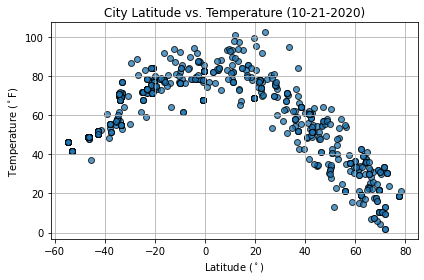

In [15]:
# create scatter plots with lattidudes against temp, humidity, cloudiness and wind speed 
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("output/fig1.png")
plt.show()

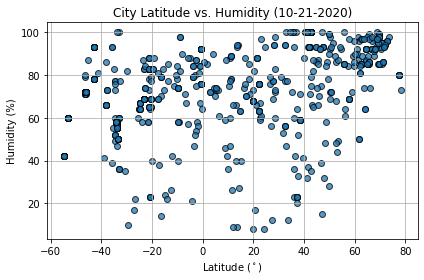

In [31]:
# create scatter plots with lattidudes against temp, humidity, cloudiness and wind speed 
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()

plt.savefig("output/fig2.png")
plt.show()

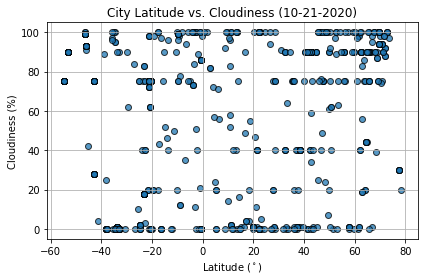

In [32]:
# create scatter plots with lattidudes against temp, humidity, cloudiness and wind speed 
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()

plt.savefig("output/fig3.png")
plt.show()

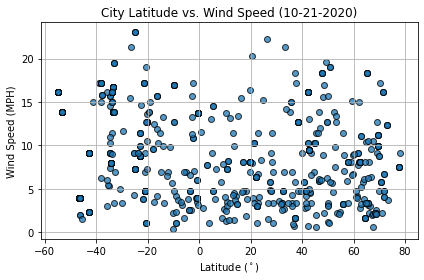

In [33]:
# create scatter plots with lattidudes against temp, humidity, cloudiness and wind speed 
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()

plt.savefig("output/fig4.png")
plt.show()

In [34]:
# OBSERVATIONS:
# It seems that city temps are hotter near the equator.(First Graph Latidude vs Temp).

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]

In [20]:

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.92


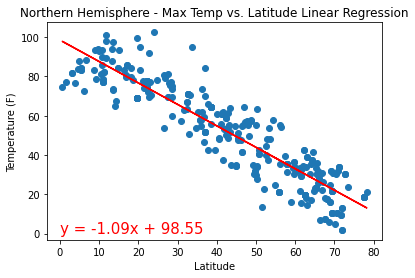

In [22]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression¶

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Temperature (F)"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("output/NortHemispere-MaxTempv-LLR.png")



The r-squared is : 0.33


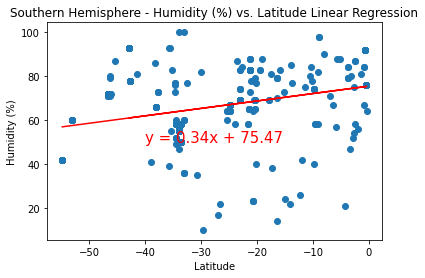

In [23]:
#Southern Hemisphere - Temp vs. Latitude Linear Regression

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Humidity (%)"])
annotate(equation, -40, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output/SouthHemisphere-Humidity-LLR.png")


The r-squared is : 0.33


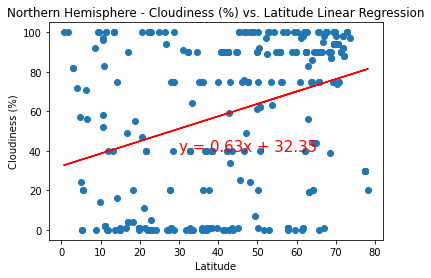

In [24]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness (%)"])
annotate(equation, 30, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output/NorthernHemisphere-Cloudiness-LLR.png")

The r-squared is : -0.15


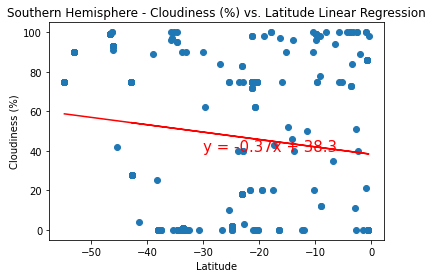

In [25]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness (%)"])
annotate(equation, -30, 40)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output/SouthernHemisphere-Cloudiness-LLR.png")

The r-squared is : 0.07


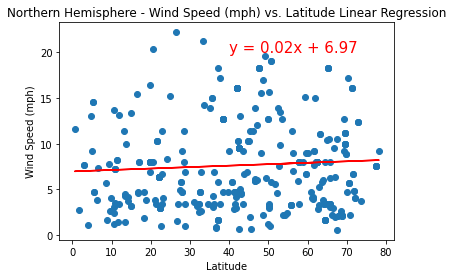

In [26]:

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed (MPH)"])

annotate(equation, 40, 20)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output/NorthernHemisphere-WindSeed-LLR")

The r-squared is : -0.25


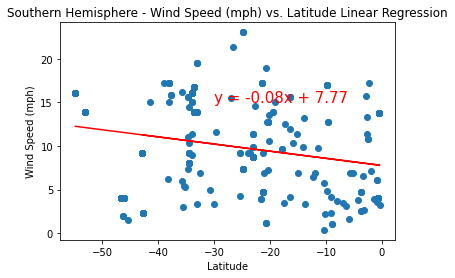

In [28]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed (MPH)"])
annotate(equation, -30, 15)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output/SouthernHemisphere-WindSpeed-LLR.png")